In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
%matplotlib inline

In [2]:
def LR_tune(X_tr,y_tr,reg):
    
    C = [0.001,0.01,0.1,1,10,100]
    penalty = [reg]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = LogisticRegression()
    # hyper parameters to be used for grid search
    parameters = dict(C=C,penalty=penalty)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    #train_accuracy = grid_clf.cv_results_['mean_train_score']
    #cv_accuracy = grid_clf.cv_results_['mean_test_score']
    
    opt_c = grid_clf.best_params_['C']
    
    return opt_c

In [3]:
def LR_final(X_tr,y_tr,C,reg):
    
    clf = LogisticRegression(C=C,penalty = reg)
    clf.fit(X_tr, y_tr)

    return clf

In [4]:
def rbfsvm_tune(X_tr,y_tr):
    
    C = [0.001,0.01,0.1,1,10,100]
    #penalty = reg
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = SVC()
    
    # hyper parameters to be used for grid search
    parameters = dict(C = C)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    #train_accuracy = grid_clf.cv_results_['mean_train_score']
    #cv_accuracy = grid_clf.cv_results_['mean_test_score']
    
    opt_h = grid_clf.best_params_['C']
    
    return opt_h

In [5]:
def rbfsvm_final(X_tr,y_tr,C):
    
    clf = SVC(C = C)
    #cal_clf = CalibratedClassifierCV(base_estimator = clf, method ='sigmoid', cv ='prefit' )
    clf.fit(X_tr, y_tr)
    
    return clf

In [6]:
def dt_tune(X_tr,y_tr):
    
    max_depth = [1, 5, 10, 50, 100, 500, 100]
    min_samples_split = [5, 10, 100, 500]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = DecisionTreeClassifier()
    
    
    # hyper parameters to be used for grid search
    parameters = dict(max_depth = max_depth, min_samples_split = min_samples_split)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    #train_accuracy = grid_clf.cv_results_['mean_train_score']
    #cv_accuracy = grid_clf.cv_results_['mean_test_score']
    
    opt_depth = grid_clf.best_params_['max_depth']
    opt_split = grid_clf.best_params_['min_samples_split']
    
    return opt_depth,opt_split

In [7]:
def dt_final(X_tr,y_tr,max_depth,min_samples_split):
    
    clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split)
    clf.fit(X_tr, y_tr)

    return clf

In [8]:
def rf_tune(X_tr,y_tr):
    
    max_depth = [1, 5, 10, 50, 100, 500, 1000]
    n_estimators = [5, 10, 100, 500, 1000]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = RandomForestClassifier()
    
    
    # hyper parameters to be used for grid search
    parameters = dict(max_depth = max_depth, n_estimators = n_estimators)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    opt_depth = grid_clf.best_params_['max_depth']
    opt_est = grid_clf.best_params_['n_estimators']
    
    return opt_depth,opt_est

In [9]:
def rf_final(X_tr,y_tr,max_depth,n_estimators):
    
    clf = RandomForestClassifier(max_depth = max_depth, n_estimators = n_estimators)
    clf.fit(X_tr, y_tr)
    
    return clf

In [10]:
def xg_tune(X_tr,y_tr):
    
    max_depth = [1, 5, 10, 50, 100, 500, 1000]
    n_estimators = [5, 10, 100, 500, 1000]
        
    # for each alpha compute cv accuracy using grid search 
    # Since we dont have sepeate CV data, using 5 fold crossvalidation on train data
    
    # Classifier to be used for grid search
    clf = XGBClassifier()
    
    
    # hyper parameters to be used for grid search
    parameters = dict(max_depth = max_depth, n_estimators = n_estimators)
    
    grid_clf = GridSearchCV(clf,parameters, scoring = 'f1', cv=5, n_jobs=-1,return_train_score = True)
    
    grid_clf.fit(X_tr,y_tr)

    
    opt_depth = grid_clf.best_params_['max_depth']
    opt_est = grid_clf.best_params_['n_estimators']
    
    return opt_depth,opt_est

In [11]:
def xg_final(X_tr,y_tr,max_depth,n_estimators):
    
    clf = XGBClassifier(max_depth = max_depth, n_estimators = n_estimators)
    clf.fit(X_tr, y_tr)
    
    return clf

In [12]:
data = pd.read_csv("train.csv")

In [13]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [16]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
# this is nothing but an imbalanced data
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [12]:
# Check with Numeric variables

In [18]:
d1 = data[['no_of_trainings','age','length_of_service','avg_training_score']]

In [19]:
d1.head()

,no_of_trainings,age,length_of_service,avg_training_score
0,1,35,8,49
1,1,30,4,60
2,1,34,7,50
3,2,39,10,50
4,1,45,2,73


In [20]:
d1.isnull().sum()

no_of_trainings       0
age                   0
length_of_service     0
avg_training_score    0
dtype: int64

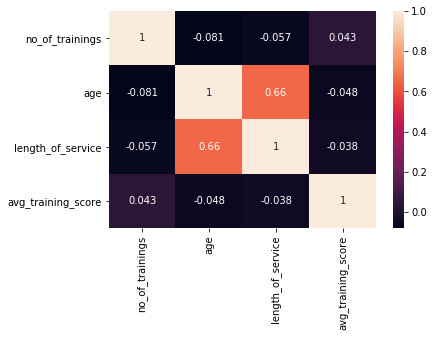

In [21]:
sns.heatmap(d1.corr(),annot =True)

In [22]:
# 1. convert age to bin and use as categorical variable
# 2. High positive corelation between age and length of service

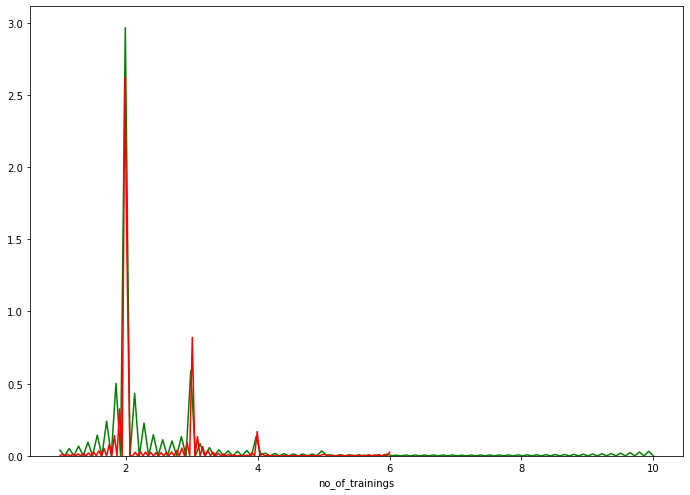

In [23]:
target_0 = data.loc[data['is_promoted'] == 0]
target_1 = data.loc[data['is_promoted'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(target_0 ['no_of_trainings'],hist=False,color ="g") 
sns.distplot(target_1 ['no_of_trainings'],hist=False,color ="r") 

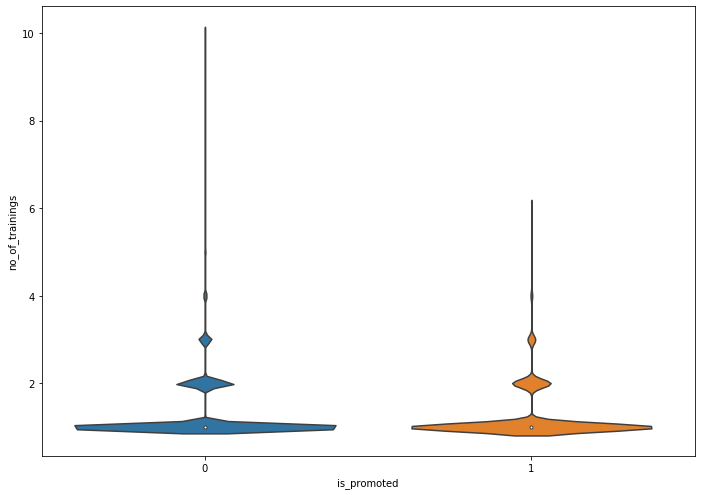

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="is_promoted", y="no_of_trainings", data=data)

In [25]:
# we cant say like as the number of training increases the chance of promotin also increases
# number of persons who got promoted is zero when number of trainings are greater than 6
# binning can be considered

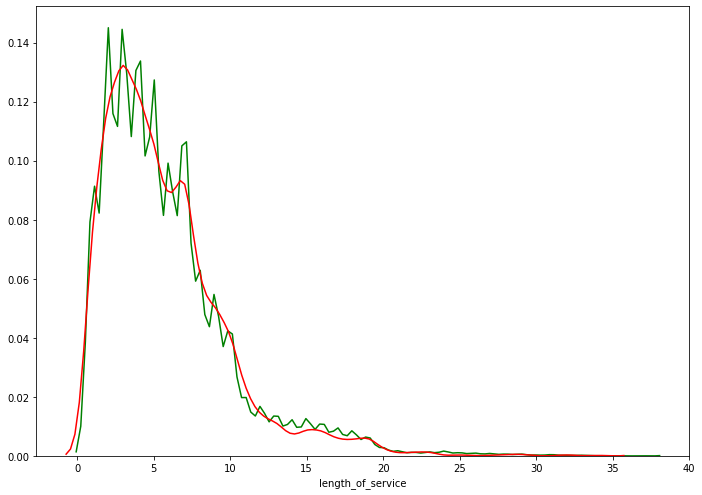

In [26]:
target_0 = data.loc[data['is_promoted'] == 0]
target_1 = data.loc[data['is_promoted'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(target_0 ['length_of_service'],hist=False,color ="g") 
sns.distplot(target_1 ['length_of_service'],hist=False,color ="r") 

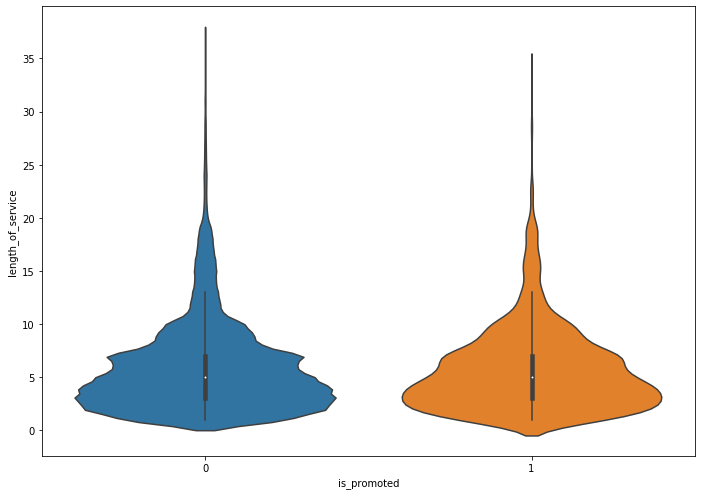

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="is_promoted", y="length_of_service", data=data)

In [28]:
# binning can be considered

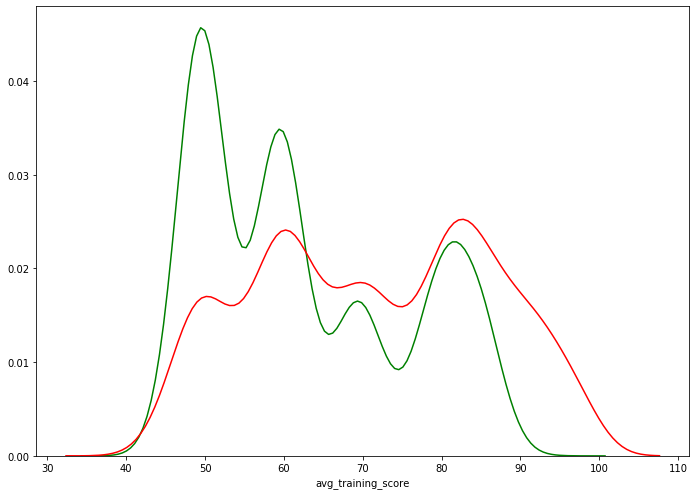

In [29]:
target_0 = data.loc[data['is_promoted'] == 0]
target_1 = data.loc[data['is_promoted'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(target_0 ['avg_training_score'],hist=False,color ="g") 
sns.distplot(target_1 ['avg_training_score'],hist=False,color ="r") 

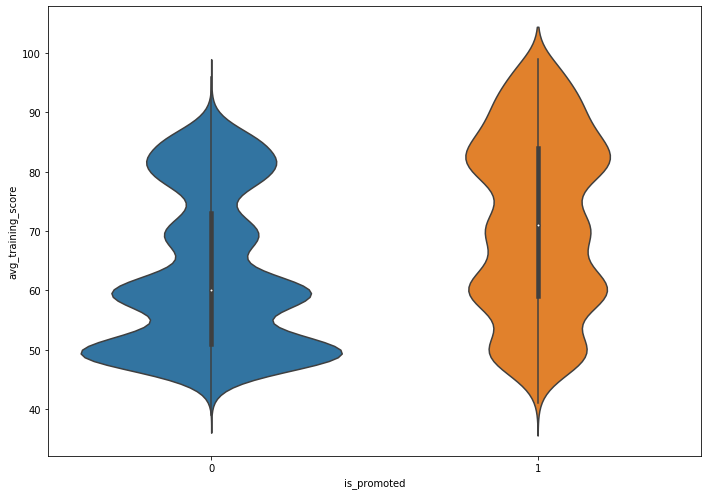

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.violinplot(x="is_promoted", y="avg_training_score", data=data)

In [26]:
# binning can be considered

In [31]:
#binning No of trainings
data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [32]:
bins = [0, 2, 5,10]
labels =[1,2,3]
data['training_bin'] = pd.cut(data['no_of_trainings'], bins,labels=labels)

In [29]:
#binning age
#data['age'].value_counts()

In [33]:
bins = [18,20,30,40,50,60]
labels =[1,2,3,4,5]
data['age_bin'] = pd.cut(data['age'], bins,labels=labels)

In [34]:
#binning length_of_service
#data['length_of_service'].value_counts()

In [35]:
bins = [0,10,20,30,40]
labels =[1,2,3,4]
data['service_bin'] = pd.cut(data['length_of_service'], bins,labels=labels)

In [36]:
#binning avg_training_score
#data['avg_training_score'].value_counts()

In [37]:
bins = [0,50,60,70,80,90,100]
labels =[1,2,3,4,5,6]
data['score_bin'] = pd.cut(data['avg_training_score'], bins,labels=labels)

In [38]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,training_bin,age_bin,service_bin,score_bin
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,1,3,1,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,1,2,1,2
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,1,3,1,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1,3,1,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,1,4,1,4


In [39]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
training_bin               0
age_bin                    0
service_bin                0
score_bin                  0
dtype: int64

In [40]:
# Filling rating null values with 1
data['previous_year_rating'].fillna(1,inplace =True)
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
training_bin               0
age_bin                    0
service_bin                0
score_bin                  0
dtype: int64

In [41]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [42]:
# Filling education null values with "Below secondary"
data['education'].fillna('Below Secondary',inplace =True)
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
training_bin            0
age_bin                 0
service_bin             0
score_bin               0
dtype: int64

In [43]:
# Transformation
# Encoding in to numerical categories
label = preprocessing.LabelEncoder()   
data['dept_Code'] = label.fit_transform(data['department'])
data['region_Code'] = label.fit_transform(data['region'])
data['edu_Code'] = label.fit_transform(data['education'])
data['gender_Code'] = label.fit_transform(data['gender'])
data['ch_Code'] = label.fit_transform(data['recruitment_channel'])  

In [44]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,is_promoted,training_bin,age_bin,service_bin,score_bin,dept_Code,region_Code,edu_Code,gender_Code,ch_Code
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,1,3,1,1,7,31,2,0,2
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,1,2,1,2,4,14,0,1,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,1,3,1,1,7,10,0,1,2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,1,3,1,1,7,15,0,1,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,1,4,1,4,8,18,0,1,0


In [46]:
# adding polynomial features
def add_interactions(df):
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns)+['_'.join(x) for x in combos]
    
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indices = [i for i,x in enumerate(list((df==0).all())) if x]
    df= df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [47]:
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [48]:
X = data[['dept_Code','region_Code','edu_Code','gender_Code','ch_Code','training_bin','age_bin','previous_year_rating','service_bin','KPIs_met >80%','awards_won?','score_bin']]
#X = data[['education','previous_year_rating','age','length_of_service','KPIs_met >80%','avg_training_score']]
y = data['is_promoted']

In [49]:
X.head()

,dept_Code,region_Code,edu_Code,gender_Code,ch_Code,training_bin,age_bin,previous_year_rating,service_bin,KPIs_met >80%,awards_won?,score_bin
0,7,31,2,0,2,1,3,5.0,1,1,0,1
1,4,14,0,1,0,1,2,5.0,1,0,0,2
2,7,10,0,1,2,1,3,3.0,1,0,0,1
3,7,15,0,1,0,1,3,1.0,1,0,0,1
4,8,18,0,1,0,1,4,3.0,1,0,0,4


In [50]:
X.shape

(54808, 12)

In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [52]:
X = add_interactions(X)
X.shape

(54808, 78)

In [53]:
# Standard Scaling
scaler = preprocessing.StandardScaler()
X_sc = scaler.fit_transform(X)
X_sc = pd.DataFrame(X_sc, columns=X.columns)
X_sc.head()

,dept_Code,region_Code,edu_Code,gender_Code,ch_Code,training_bin,age_bin,previous_year_rating,service_bin,KPIs_met >80%,...,previous_year_rating_service_bin,previous_year_rating_KPIs_met >80%,previous_year_rating_awards_won?,previous_year_rating_score_bin,service_bin_KPIs_met >80%,service_bin_awards_won?,service_bin_score_bin,KPIs_met >80%_awards_won?,KPIs_met >80%_score_bin,awards_won?_score_bin
0,0.808933,1.776526,1.577483,-1.536223,1.154111,-0.213043,0.104369,1.358824,-0.331539,1.356878,...,0.732980,1.904826,-0.142379,-0.614125,1.127077,-0.150906,-1.118942,-0.123927,-0.012687,-0.138077
1,-0.388183,-0.163034,-0.681339,0.650947,-0.885239,-0.213043,-1.108316,1.358824,-0.331539,-0.736986,...,0.732980,-0.673581,-0.142379,0.190836,-0.695937,-0.150906,-0.577199,-0.123927,-0.631881,-0.138077
2,0.808933,-0.619401,-0.681339,0.650947,1.154111,-0.213043,0.104369,-0.113352,-0.331539,-0.736986,...,-0.274005,-0.673581,-0.142379,-0.936109,-0.695937,-0.150906,-1.118942,-0.123927,-0.631881,-0.138077
3,0.808933,-0.048942,-0.681339,0.650947,-0.885239,-0.213043,0.104369,-1.585528,-0.331539,-0.736986,...,-1.280991,-0.673581,-0.142379,-1.258093,-0.695937,-0.150906,-1.118942,-0.123927,-0.631881,-0.138077
4,1.207972,0.293333,-0.681339,0.650947,-0.885239,-0.213043,1.317053,-0.113352,-0.331539,-0.736986,...,-0.274005,-0.673581,-0.142379,0.512820,-0.695937,-0.150906,0.506288,-0.123927,-0.631881,-0.138077


In [86]:
# Splitting in to Training and Test sets
X_tr, X_test, y_tr, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=1)

In [55]:
# Sampling https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
X_tr['target'] = y_tr
# Class count
class_0, class_1 = X_tr.target.value_counts()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
X_tr.target.value_counts()

0    35082
1     3283
Name: target, dtype: int64

In [57]:
# Divide by class
df_class_0 = X_tr[X_tr['target'] == 0]
df_class_1 = X_tr[X_tr['target'] == 1]

df_class_0_under = df_class_0.sample(class_1)
X_tr_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [58]:
X_tr_under.target.value_counts()

1    3283
0    3283
Name: target, dtype: int64

In [59]:
X_tr_under.head()

,dept_Code,region_Code,edu_Code,gender_Code,ch_Code,training_bin,age_bin,previous_year_rating,service_bin,KPIs_met >80%,...,previous_year_rating_KPIs_met >80%,previous_year_rating_awards_won?,previous_year_rating_score_bin,service_bin_KPIs_met >80%,service_bin_awards_won?,service_bin_score_bin,KPIs_met >80%_awards_won?,KPIs_met >80%_score_bin,awards_won?_score_bin,target
53295,-1.585299,-0.163034,1.577483,0.650947,1.154111,-0.213043,0.104369,-0.113352,-0.331539,-0.736986,...,-0.673581,-0.142379,-0.453132,-0.695937,-0.150906,-0.577199,-0.123927,-0.631881,-0.138077,0
26002,0.808933,-0.163034,-0.681339,0.650947,-0.885239,4.431538,0.104369,-0.113352,-0.331539,-0.736986,...,-0.673581,-0.142379,-0.453132,-0.695937,-0.150906,-0.577199,-0.123927,-0.631881,-0.138077,0
24083,-0.787222,-1.418043,-0.681339,0.650947,-0.885239,-0.213043,0.104369,1.358824,-0.331539,1.356878,...,1.904826,-0.142379,0.190836,1.127077,-0.150906,-0.577199,-0.123927,0.606507,-0.138077,0
15734,-1.984338,1.776526,-0.681339,0.650947,1.154111,-0.213043,1.317053,1.358824,-0.331539,-0.736986,...,-0.673581,-0.142379,2.605717,-0.695937,-0.150906,1.048032,-0.123927,-0.631881,-0.138077,0
31060,-1.984338,-0.163034,1.577483,0.650947,1.154111,-0.213043,-1.108316,0.622736,-0.331539,1.356878,...,1.389145,-0.142379,1.800757,1.127077,-0.150906,1.048032,-0.123927,2.464090,-0.138077,0


In [60]:
y_tr_under = X_tr_under['target']
type(y_tr_under)

pandas.core.series.Series

In [61]:
X_tr_under.drop('target',axis=1,inplace = True)
X_tr_under.head()

,dept_Code,region_Code,edu_Code,gender_Code,ch_Code,training_bin,age_bin,previous_year_rating,service_bin,KPIs_met >80%,...,previous_year_rating_service_bin,previous_year_rating_KPIs_met >80%,previous_year_rating_awards_won?,previous_year_rating_score_bin,service_bin_KPIs_met >80%,service_bin_awards_won?,service_bin_score_bin,KPIs_met >80%_awards_won?,KPIs_met >80%_score_bin,awards_won?_score_bin
53295,-1.585299,-0.163034,1.577483,0.650947,1.154111,-0.213043,0.104369,-0.113352,-0.331539,-0.736986,...,-0.274005,-0.673581,-0.142379,-0.453132,-0.695937,-0.150906,-0.577199,-0.123927,-0.631881,-0.138077
26002,0.808933,-0.163034,-0.681339,0.650947,-0.885239,4.431538,0.104369,-0.113352,-0.331539,-0.736986,...,-0.274005,-0.673581,-0.142379,-0.453132,-0.695937,-0.150906,-0.577199,-0.123927,-0.631881,-0.138077
24083,-0.787222,-1.418043,-0.681339,0.650947,-0.885239,-0.213043,0.104369,1.358824,-0.331539,1.356878,...,0.732980,1.904826,-0.142379,0.190836,1.127077,-0.150906,-0.577199,-0.123927,0.606507,-0.138077
15734,-1.984338,1.776526,-0.681339,0.650947,1.154111,-0.213043,1.317053,1.358824,-0.331539,-0.736986,...,0.732980,-0.673581,-0.142379,2.605717,-0.695937,-0.150906,1.048032,-0.123927,-0.631881,-0.138077
31060,-1.984338,-0.163034,1.577483,0.650947,1.154111,-0.213043,-1.108316,0.622736,-0.331539,1.356878,...,0.229488,1.389145,-0.142379,1.800757,1.127077,-0.150906,1.048032,-0.123927,2.464090,-0.138077


In [87]:
#opt_c_l1 = LR_tune(X_tr_under,y_tr_under,'l1')
opt_c_l1 = LR_tune(X_tr,y_tr,'l1')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
#clf1 = LR_final(X_tr_under,y_tr_under,opt_c_l1,'l1')
clf1 = LR_final(X_tr,y_tr,opt_c_l1,'l1')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
y_pred1 = clf1.predict(X_test)

In [90]:
f1_score1 = f1_score(y_test,y_pred1)

In [91]:
f1_score1

0.1586475942782835

In [67]:
opt_c_l2 = LR_tune(X_tr_under,y_tr_under,'l2')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
clf2 = LR_final(X_tr_under,y_tr_under,opt_c_l2,'l2')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
y_pred2 = clf2.predict(X_test)

In [70]:
f1_score2 = f1_score(y_test,y_pred2)

In [71]:
#in binary classification, the count of TN is (0,0), FN is(1,0) , TP is (1,1)  and false positives is (0,1)
confusion_matrix(y_test,y_pred2)

array([[9830, 5228],
       [ 250, 1135]], dtype=int64)

In [72]:
f1_score2

0.2929788332472896

In [73]:
opt_h = rbfsvm_tune(X_tr_under,y_tr_under)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [74]:
clf3 = rbfsvm_final(X_tr_under,y_tr_under,opt_h)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [75]:
y_pred3 = clf3.predict(X_test)

In [76]:
f1_score3 = f1_score(y_test,y_pred3)

In [77]:
f1_score3

0.2981334697008438

In [78]:
opt_h, opt_split = dt_tune(X_tr_under,y_tr_under)

In [79]:
clf4 = dt_final(X_tr_under,y_tr_under,opt_h,opt_split)

In [80]:
y_pred4 = clf4.predict(X_test)

In [81]:
f1_score4 = f1_score(y_test,y_pred4)

In [82]:
f1_score4

0.3060344827586207

In [103]:
opt_h, opt_est = rf_tune(X_tr_under,y_tr_under)

In [92]:
clf5 = rf_final(X_tr_under,y_tr_under,opt_h,opt_est)

In [93]:
y_pred5 = clf5.predict(X_test)

In [94]:
f1_score5 = f1_score(y_test,y_pred5)

In [95]:
f1_score5

0.32116980634962455

In [ ]:
#opt_h, opt_est = xg_tune(X_tr_under,y_tr_under)
opt_h, opt_est = xg_tune(X_tr,y_tr)

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [109]:
#clf6 = xg_final(X_tr_under,y_tr_under,opt_h,opt_est)
clf6 = xg_final(X_tr,y_tr,opt_h,opt_est)

In [110]:
y_pred6 = clf6.predict(X_test)

In [111]:
f1_score6 = f1_score(y_test,y_pred6)

In [112]:
f1_score6

0.35023568061705473

In [40]:
test_data  = pd.read_csv("test.csv")

In [41]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [42]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [43]:
test_data['previous_year_rating'].fillna(0,inplace =True)
test_data['education'].fillna('Below Secondary',inplace =True)
test_data['education'] = test_data['education'].map({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [44]:
X_check = test_data[['education','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]
#X_check = test_data[['education','previous_year_rating','length_of_service','KPIs_met >80%','avg_training_score']]

In [45]:
y_pred3 = clf2.predict(X_check)

In [48]:
d = {'employee_id': test_data['employee_id'], 'is_promoted': y_pred3}
upload = pd.DataFrame(d)

In [49]:
upload.to_csv("upload.csv",index=False)

In [109]:
y_pred5 = clf3.predict(X_check)

In [110]:
d = {'employee_id': test_data['employee_id'], 'is_promoted': y_pred5}
upload = pd.DataFrame(d)

In [111]:
upload.to_csv("upload.csv",index=False)